# Convex Hull Algorithms
On the following lines there are two algorithms which compute a convex hull on set of points 2D space.

## Imports
Mounting Drive for Collab
*   Skip this step while operating on the local machine (Jupyter Notebook)



In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing used python libraries 

In [28]:
import time
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

2D Point Representation

In [29]:
class Point:
    def __init__(self, x = None, y = None):
        self.x = x
        self.y = y
p0 = Point(0, 0)

## Data Generation
Creating random sets of 2D points. There are several sets with different sizes and different distributions.
*   Even Distriburion
*   Normal/Gaussian Distribution


In [30]:
S = 1_000
M = 10_000
L = 25_000
XL = 50_000
XXL = 100_000

e1 = [Point(np.random.randint(0,2*S),np.random.randint(0,2*S)) for i in range(S)]
e2 = [Point(np.random.randint(0,2*M),np.random.randint(0,2*M)) for i in range(M)]
e3 = [Point(np.random.randint(0,2*L),np.random.randint(0,2*L)) for i in range(L)]
e4 = [Point(np.random.randint(0,2*XL),np.random.randint(0,2*XL)) for i in range(XL)]
e5 = [Point(np.random.randint(0,2*XXL),np.random.randint(0,2*XXL)) for i in range(XXL)]

g1 = [Point(np.random.normal(2*S,S/2),np.random.normal(2*S,S/2)) for i in range(S)]
g2 = [Point(np.random.normal(2*M,M/2),np.random.normal(2*M,M/2)) for i in range(M)]
g3 = [Point(np.random.normal(2*L,L/2),np.random.normal(2*L,L/2)) for i in range(L)]
g4 = [Point(np.random.normal(2*XL,XL/2),np.random.normal(2*XL,XL/2)) for i in range(XL)]
g5 = [Point(np.random.normal(2*XXL,XXL/2),np.random.normal(2*XXL,XXL/2)) for i in range(XXL)]

even_data = [e1,e2,e3,e4,e5]
gauss_data = [g1,g2,g3,g4,g5]

## Implementation

Jarvis March (Gift Wrapping)

In [31]:
# https://www.geeksforgeeks.org/convex-hull-set-1-jarviss-algorithm-or-wrapping/?ref=lbp
class Jarvis:
    def __init__(self,points):
        self.points = points

    def Left_index(self,points):
        minn = 0
        for i in range(1,len(points)):
            if points[i].x < points[minn].x:
                minn = i
            elif points[i].x == points[minn].x:
                if points[i].y > points[minn].y:
                    minn = i
        return minn
    
    def orientation(self,p, q, r):
        val =   (q.y - p.y) * (r.x - q.x) - \
                (q.x - p.x) * (r.y - q.y)
        if val == 0:
            return 0
        elif val > 0:
            return 1
        else:
            return 2
    
    def convexHull(self):
        points = self.points
        n = len(points)
        if n < 3:
            return
        l = self.Left_index(points)
        hull = []
        p = l
        q = 0
        while(True):   
            hull.append(p)
            q = (p + 1) % n
            for i in range(n):
                if(self.orientation(points[p], points[i], points[q]) == 2):
                    q = i
            p = q
            if(p == l):
                break
        result = []
        for each  in hull:
            result.append(Point(points[each].x, points[each ].y))
        return result

Graham Scan

In [32]:
# https://lvngd.com/blog/convex-hull-graham-scan-algorithm-python/
class Graham:
    def __init__(self, points):
        pts = []
        for e in points:
            pts.append((e.x,e.y))
        self.pts = pts
        self.points = points
        
    def get_cross_product(self,p1, p2, p3):
        return ((p2[0] - p1[0])*(p3[1] - p1[1])) - ((p2[1] - p1[1])*(p3[0] - p1[0]))

    def get_slope(self,p1, p2):
        if p1[0] == p2[0]:
            return float('inf')
        else:
            return 1.0*(p1[1]-p2[1])/(p1[0]-p2[0])

    def convexHull(self):
        hull = []
        self.pts.sort(key=lambda x:[x[0],x[1]])
        start = self.pts.pop(0)
        hull.append(start)
        self.pts.sort(key=lambda p: (self.get_slope(p,start), -p[1],p[0]))
        for pt in self.pts:
            hull.append(pt)
            while len(hull) > 2 and self.get_cross_product(hull[-3],hull[-2],hull[-1]) < 0:
                hull.pop(-2)
        result = []
        for e in hull:
            result.append(Point(e[0],e[1]))
        return result

## Results
Testing Methods

In [33]:
def makeGraph(points,hull,name):
    x = []
    y = []
    x_h = []
    y_h = []
    for e in points:
        x.append(e.x)
        y.append(e.y)
    for e in hull:
        x_h.append(e.x)
        y_h.append(e.y)
    x_h.append(hull[0].x)
    y_h.append(hull[0].y)

    plt.scatter(x, y, c='royalblue', marker='.', label='pts')
    plt.plot(x_h, y_h, c='red', linestyle='-', label='line')
    plt.scatter(x_h, y_h, c='royalblue', marker='o', label='conv')
    plt.title(name)
    #plt.legend(loc='upper left')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
  
    return plt

def test_convex(points,algo,name,distr):
    a = algo(points)
    start = time.time()
    hull = a.convexHull()
    end = time.time()

    plt = makeGraph(points, hull, name)
    plt.savefig('%s_%s_%s.png' % (distr, name, str(len(points))))
    plt.show();
    
    print(f"Algorithm: {name}")
    print(f"Distribution: {distr}")
    print(f"Dataset: {len(points)} points")
    print(f"Duration: {end - start} s\n")
    return (end - start)  

Graphs and execution times

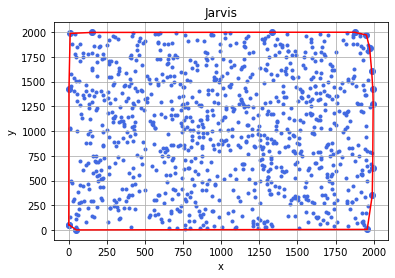

Algorithm: Jarvis
Distribution: Even
Dataset: 1000 points
Duration: 0.010989904403686523 s



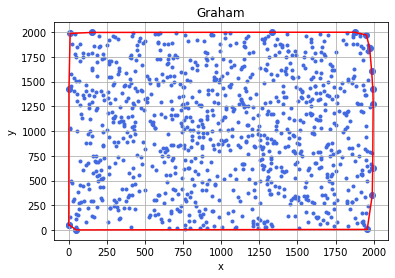

Algorithm: Graham
Distribution: Even
Dataset: 1000 points
Duration: 0.002993345260620117 s



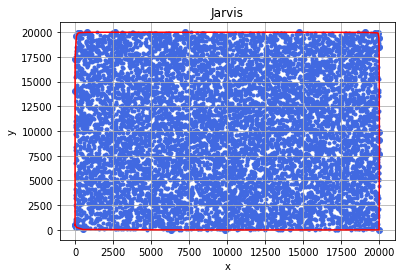

Algorithm: Jarvis
Distribution: Even
Dataset: 10000 points
Duration: 0.17353487014770508 s



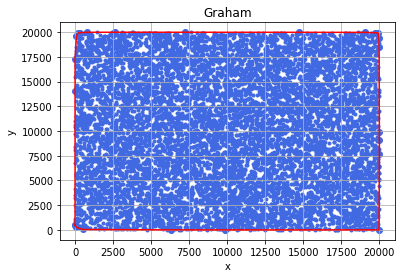

Algorithm: Graham
Distribution: Even
Dataset: 10000 points
Duration: 0.03594088554382324 s



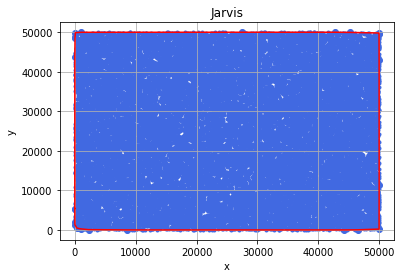

Algorithm: Jarvis
Distribution: Even
Dataset: 25000 points
Duration: 0.43982458114624023 s



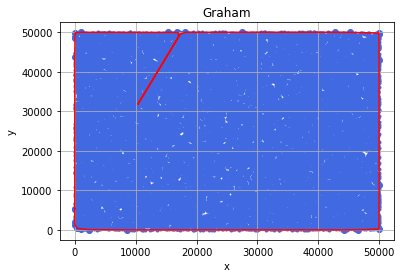

Algorithm: Graham
Distribution: Even
Dataset: 25000 points
Duration: 0.08975958824157715 s



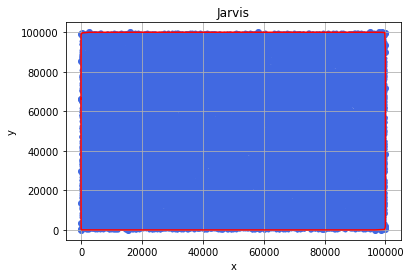

Algorithm: Jarvis
Distribution: Even
Dataset: 50000 points
Duration: 1.040217638015747 s



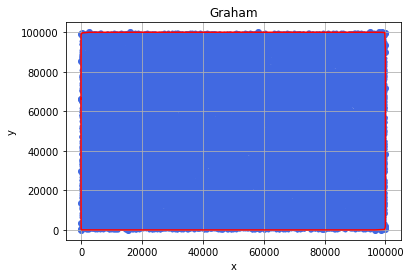

Algorithm: Graham
Distribution: Even
Dataset: 50000 points
Duration: 0.19547700881958008 s



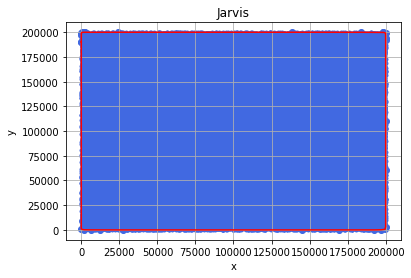

Algorithm: Jarvis
Distribution: Even
Dataset: 100000 points
Duration: 2.120424270629883 s



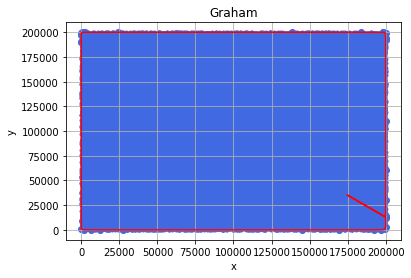

Algorithm: Graham
Distribution: Even
Dataset: 100000 points
Duration: 0.47797632217407227 s



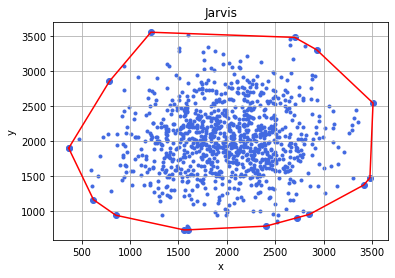

Algorithm: Jarvis
Distribution: Gauss
Dataset: 1000 points
Duration: 0.009976387023925781 s



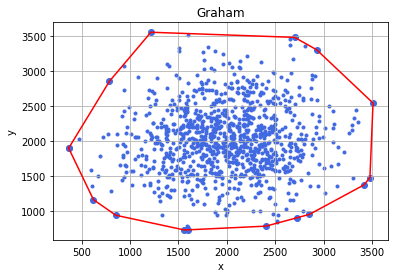

Algorithm: Graham
Distribution: Gauss
Dataset: 1000 points
Duration: 0.0029921531677246094 s



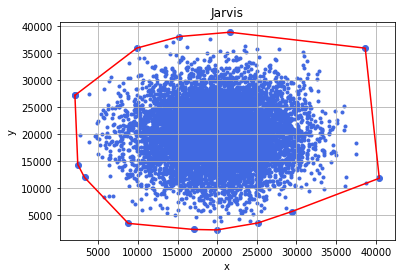

Algorithm: Jarvis
Distribution: Gauss
Dataset: 10000 points
Duration: 0.08976101875305176 s



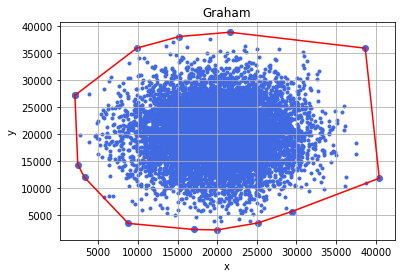

Algorithm: Graham
Distribution: Gauss
Dataset: 10000 points
Duration: 0.02991962432861328 s



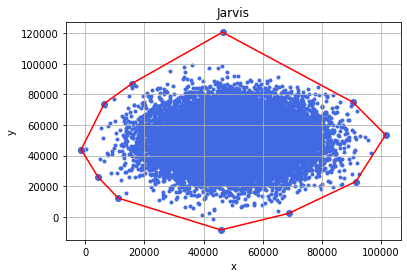

Algorithm: Jarvis
Distribution: Gauss
Dataset: 25000 points
Duration: 0.18151545524597168 s



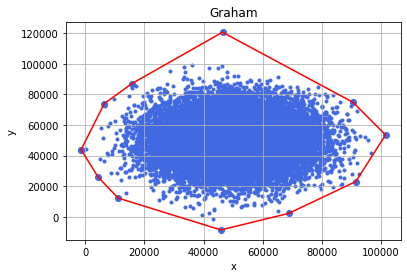

Algorithm: Graham
Distribution: Gauss
Dataset: 25000 points
Duration: 0.08377623558044434 s



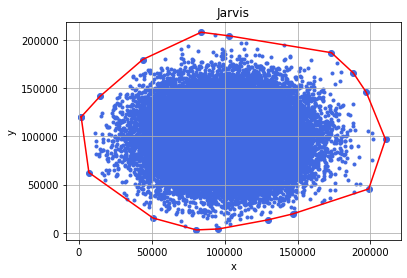

Algorithm: Jarvis
Distribution: Gauss
Dataset: 50000 points
Duration: 0.5196824073791504 s



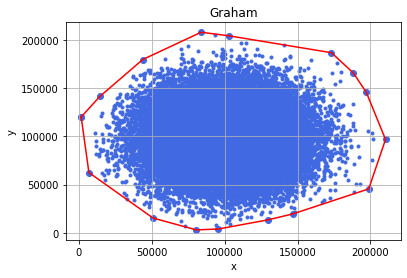

Algorithm: Graham
Distribution: Gauss
Dataset: 50000 points
Duration: 0.17952919006347656 s



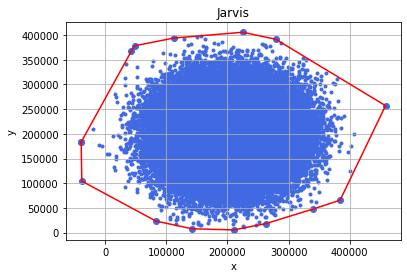

Algorithm: Jarvis
Distribution: Gauss
Dataset: 100000 points
Duration: 0.9818024635314941 s



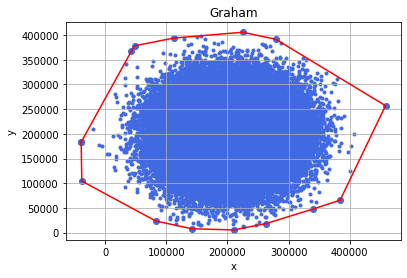

Algorithm: Graham
Distribution: Gauss
Dataset: 100000 points
Duration: 0.4584469795227051 s



In [34]:
j_even_res = []
g_even_res = []
i_even = []

j_gauss_res = []
g_gauss_res = []
i_gauss = []

for d in even_data:
    j_even_res.append(test_convex(d,Jarvis,"Jarvis","Even"))
    g_even_res.append(test_convex(d,Graham,"Graham","Even"))
    i_even.append(len(d))

for d in gauss_data:
    j_gauss_res.append(test_convex(d,Jarvis,"Jarvis","Gauss"))
    g_gauss_res.append(test_convex(d,Graham,"Graham","Gauss"))
    i_gauss.append(len(d))

## Statistics
Exporting stats to files on the disk (Jupter Notebook)

In [35]:
def makeStats(df, name):
    ax = df.plot(kind = "line", style='o-', title = name, ylabel = "sec", legend = True, grid = True )
    ax.figure.savefig(name+".png")
    df.to_csv(name+".csv")

Showing stats

Even Distribution [s]


,Jarvis,Graham
points,,
1000,0.010990,0.002993
10000,0.173535,0.035941
25000,0.439825,0.089760
50000,1.040218,0.195477
100000,2.120424,0.477976




Gauss Distribution [s]


,Jarvis,Graham
points,,
1000,0.009976,0.002992
10000,0.089761,0.029920
25000,0.181515,0.083776
50000,0.519682,0.179529
100000,0.981802,0.458447


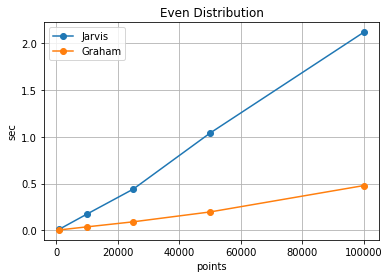

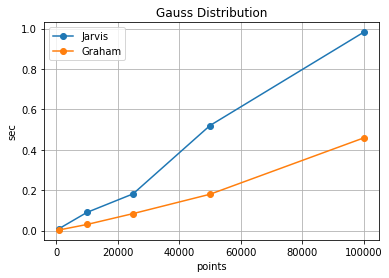

In [36]:
dataframe_even = {"points": i_even,
    "Jarvis": j_even_res,
    "Graham": g_even_res,}
dataframe_gauss = {"points": i_gauss,
    "Jarvis": j_gauss_res,
    "Graham": g_gauss_res,}

print("Even Distribution [s]")
df_even = pd.DataFrame(dataframe_even)
df_even.set_index('points', drop=True, inplace=True)
display(df_even)
print("\n")

i_gauss
print("Gauss Distribution [s]")
df_gauss = pd.DataFrame(dataframe_gauss)
df_gauss.set_index('points', drop=True, inplace=True)
display(df_gauss)
print("\n")

makeStats(df_even,"Even Distribution")
makeStats(df_gauss,"Gauss Distribution")